# 1: Librerie
Importazione di tutte le librerie necessarie per la gestione del dataset, la costruzione del modello e l'apprendimento della rete.

* `tensorflow`: Funzioni di creazione del modello, e di gestione della fase di training.
* `pandas`: Funzioni di apertura e parsing del dataset.
* `matplotlib`: Funzioni di gestione dei grafici, per la visualizzazione dei risultati in fase di training.

In [4]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

# 2: Dataset
Importazione del dataset e divisione delle istanze per validation, training e testing.

## Obiettivo del modello
Classificazione dell'età di un *abalone*, a seconda delle misure fisiche effettuate.

* Elementi: **4177** istanze
* Features disponibili: **8** colonne
* Classificazione: **3** classi

In [5]:
try:
  
  dataset = pd.read_csv("./Dataset.csv") # load the dataset

  dataset['Sex'] = LabelEncoder().fit_transform(dataset['Sex']) # label encoding for column 'Sex'

  # One-hot encoding for column 'Age'
  column     = 'Age'
  dataset    = pd.get_dummies(dataset, columns = [column], prefix = column)
  dummy_cols = [col for col in dataset.columns if col.startswith(f'{column}_')]

  Y = dataset[dummy_cols]
  X = dataset.drop(columns = dummy_cols)

  # First split: 70% train, 30% combined validation and test
  X_train, X_combined, Y_train, Y_combined = train_test_split(X, Y, test_size = 0.3, random_state = 42)

  # Second split: 65% validation, 35% test from the 30% combined set
  X_val, X_test, Y_val, Y_test = train_test_split(X_combined, Y_combined, test_size = 0.35, random_state = 42)

  print("Training set shape:  ", X_train.shape, Y_train.shape)
  print("Validation set shape:", X_val.shape, Y_val.shape)
  print("Test set shape:      ", X_test.shape, Y_test.shape)
except FileNotFoundError:
  
  print("Errore, file non trovato")

Training set shape:   (2923, 8) (2923, 3)
Validation set shape: (815, 8) (815, 3)
Test set shape:       (439, 8) (439, 3)


# 3: Creazione del modello
Generazione di un modello di rete neurale.

## Struttura della rete
* 32 neuroni con attivazione *ReLU*
* 64 neuroni con attivazione *ReLU*
* 64 neuroni con attivazione *ReLU*
* 32 neuroni con attivazione *ReLU*
* **Strato di output**: 3 neuroni con attivazione *Softmax*

In [6]:
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),             # Input layer 
    layers.Dense(32, activation='relu'),                 # Hidden layer (32 neurons)
    layers.Dense(64, activation='relu'),                 # Hidden layer (64 neurons)
    layers.Dense(64, activation='relu'),                 # Hidden layer (64 neurons)
    layers.Dense(32, activation='relu'),                 # Hidden layer (32 neurons)
    layers.Dense(Y_train.shape[1], activation='softmax') # Output layer (softmax for multi-class classification)
])

model.summary() # Print the model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,739 (34.14 KB)

 Trainable params: 8,739 (34.14 KB)

 Non-trainable params: 0 (0.00 B)

## Compilazione e training del modello generato

In [7]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss      = 'categorical_crossentropy', 
    metrics   = ['accuracy', 'Precision', 'Recall']
)

history = model.fit(
    X_train, Y_train,
    epochs          = 20, # Number of epochs
    batch_size      = 32, # Batch size
    validation_data = (X_val, Y_val)
)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - Precision: 0.6262 - Recall: 0.2648 - accuracy: 0.5169 - loss: 0.8939 - val_Precision: 0.6389 - val_Recall: 0.6294 - val_accuracy: 0.6356 - val_loss: 0.7398
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7092 - Recall: 0.6920 - accuracy: 0.7038 - loss: 0.6317 - val_Precision: 0.7310 - val_Recall: 0.7202 - val_accuracy: 0.7252 - val_loss: 0.6057
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7334 - Recall: 0.7251 - accuracy: 0.7299 - loss: 0.5672 - val_Precision: 0.7256 - val_Recall: 0.7104 - val_accuracy: 0.7178 - val_loss: 0.5900
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7480 - Recall: 0.7358 - accuracy: 0.7463 - loss: 0.5483 - val_Precision: 0.7317 - val_Recall: 0.7227 - val_accuracy: 0.7276 - val_loss: 0.5693
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Precision: 0.7520 - Recall: 0.7453 - accuracy: 0.7503 - loss: 0.5392 - val_Precision: 0.7401 - val_Recall: 0.7337 - 

## Visualizzazione dei risultati

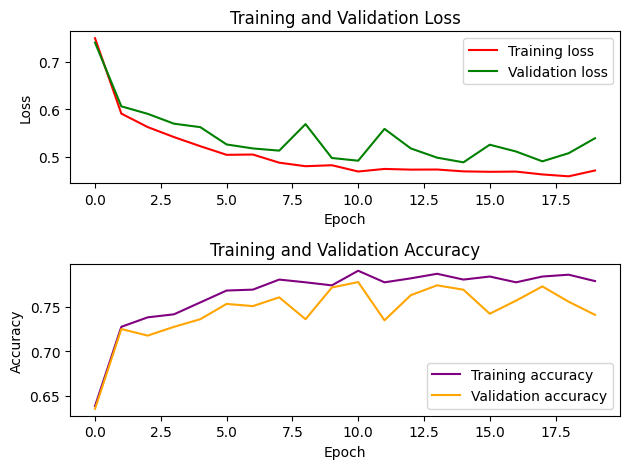

In [8]:
fig, plots = plt.subplots(2)

# Training and validation loss
plots[0].set_title('Training and Validation Loss')
plots[0].plot(model.history.history['loss'], label = 'Training loss', color = 'red')
plots[0].plot(model.history.history['val_loss'], label = 'Validation loss', color = 'green')
plots[0].set_xlabel('Epoch')
plots[0].set_ylabel('Loss')
plots[0].legend()

# Training and validation accuracy
plots[1].set_title('Training and Validation Accuracy')
plots[1].plot(model.history.history['accuracy'], label = 'Training accuracy', color = 'purple')
plots[1].plot(model.history.history['val_accuracy'], label = 'Validation accuracy',color = 'orange')
plots[1].set_xlabel('Epoch')
plots[1].set_ylabel('Accuracy')
plots[1].legend()

fig.tight_layout() # Adjust layout to prevent overlap
plt.show()         # Show the plots